# robot_data_analysis

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [4]:
df = pd.read_csv("robot_maintenancecsv.csv")

In [5]:
df.head()

,timestamp,battery_percent,battery_voltage,cpu_temp_c,motor_current_a,task_load,operating_hours,error_code,date,time
0,2025-06-29 09:00:00,100.0,16.85,61.2,3.53,0.68,0.00,OK,2025-06-29,09:00:00
1,2025-06-29 09:01:00,99.9,16.88,57.0,3.11,0.58,0.02,OK,2025-06-29,09:01:00
2,2025-06-29 09:02:00,100.0,16.73,51.5,2.18,0.41,0.03,OK,2025-06-29,09:02:00
3,2025-06-29 09:03:00,100.0,16.83,48.1,1.52,0.27,0.05,OK,2025-06-29,09:03:00
4,2025-06-29 09:04:00,99.7,16.71,56.0,2.71,0.54,0.07,OK,2025-06-29,09:04:00


In [6]:
df.describe()

,battery_percent,battery_voltage,cpu_temp_c,motor_current_a,task_load,operating_hours
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,87.524000,14.705980,52.775000,2.32200,0.424860,4.158340
std,7.222897,1.210716,5.939079,0.97866,0.195813,2.408036
min,74.400000,12.510000,39.300000,0.06000,0.000000,0.000000
25%,81.575000,13.690000,48.600000,1.62000,0.280000,2.077500
50%,87.550000,14.700000,52.700000,2.31000,0.420000,4.160000
75%,93.600000,15.752500,56.800000,2.96000,0.550000,6.235000
max,100.000000,16.880000,68.100000,4.87000,0.920000,8.320000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        500 non-null    object 
 1   battery_percent  500 non-null    float64
 2   battery_voltage  500 non-null    float64
 3   cpu_temp_c       500 non-null    float64
 4   motor_current_a  500 non-null    float64
 5   task_load        500 non-null    float64
 6   operating_hours  500 non-null    float64
 7   error_code       500 non-null    object 
 8   date             500 non-null    object 
 9   time             500 non-null    object 
dtypes: float64(6), object(4)
memory usage: 39.2+ KB


In [8]:
df.shape

(500, 10)

In [9]:
df.isnull().sum()

timestamp          0
battery_percent    0
battery_voltage    0
cpu_temp_c         0
motor_current_a    0
task_load          0
operating_hours    0
error_code         0
date               0
time               0
dtype: int64

In [10]:
df.columns

Index(['timestamp', 'battery_percent', 'battery_voltage', 'cpu_temp_c',
       'motor_current_a', 'task_load', 'operating_hours', 'error_code', 'date',
       'time'],
      dtype='object')

In [11]:
df.dtypes

timestamp           object
battery_percent    float64
battery_voltage    float64
cpu_temp_c         float64
motor_current_a    float64
task_load          float64
operating_hours    float64
error_code          object
date                object
time                object
dtype: object

# data processing

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [13]:
df.head()

,timestamp,battery_percent,battery_voltage,cpu_temp_c,motor_current_a,task_load,operating_hours,error_code,date,time
0,2025-06-29 09:00:00,100.0,16.85,61.2,3.53,0.68,0.00,OK,2025-06-29,09:00:00
1,2025-06-29 09:01:00,99.9,16.88,57.0,3.11,0.58,0.02,OK,2025-06-29,09:01:00
2,2025-06-29 09:02:00,100.0,16.73,51.5,2.18,0.41,0.03,OK,2025-06-29,09:02:00
3,2025-06-29 09:03:00,100.0,16.83,48.1,1.52,0.27,0.05,OK,2025-06-29,09:03:00
4,2025-06-29 09:04:00,99.7,16.71,56.0,2.71,0.54,0.07,OK,2025-06-29,09:04:00


In [14]:
df = df.dropna()  

In [15]:
df['battery_drop'] = df['battery_percent'].diff().fillna(0)
df['temp_avg'] = df['cpu_temp_c'].rolling(3).mean().bfill()


In [16]:
df['error_code_encoded'] = df['error_code'].astype('category').cat.codes

# EDA

<Axes: title={'center': 'Battery Over Time'}, xlabel='time'>

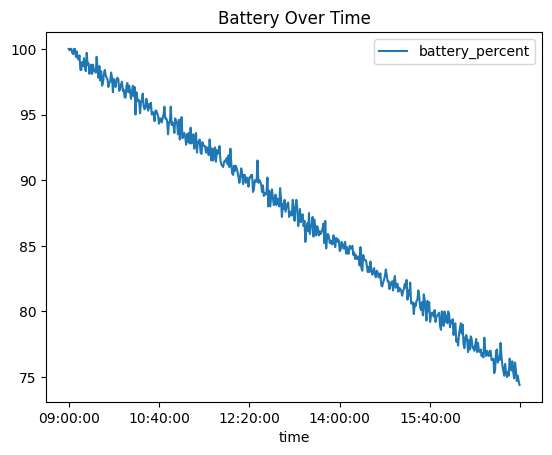

In [17]:
# Battery % over time
df.plot(x='time', y='battery_percent', title='Battery Over Time')

<Axes: xlabel='cpu_temp_c', ylabel='Count'>

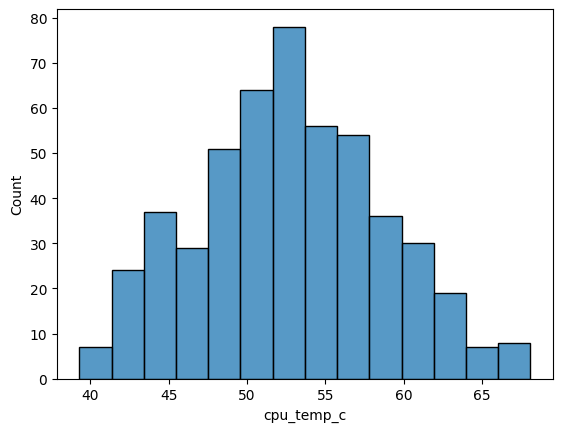

In [18]:
# CPU temp histogram
sns.histplot(df['cpu_temp_c'])

<Axes: xlabel='error_code', ylabel='count'>

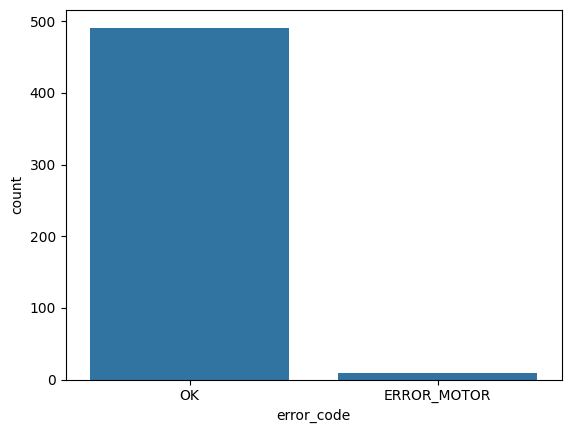

In [19]:
# Error count
sns.countplot(data=df, x='error_code')


<Axes: >

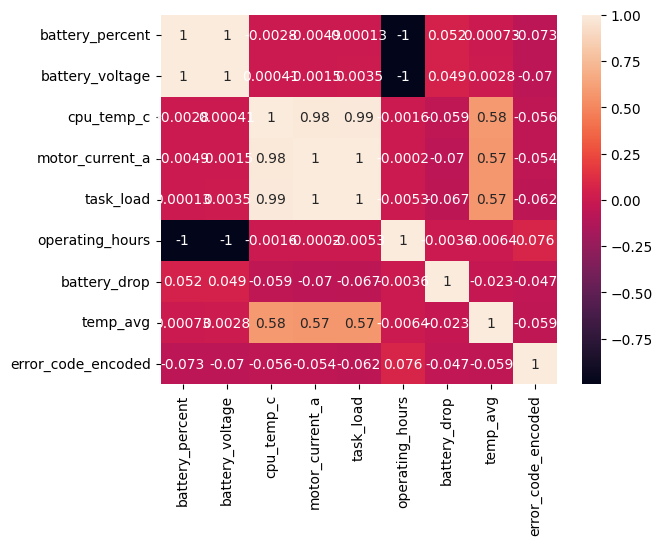

In [20]:
# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True)


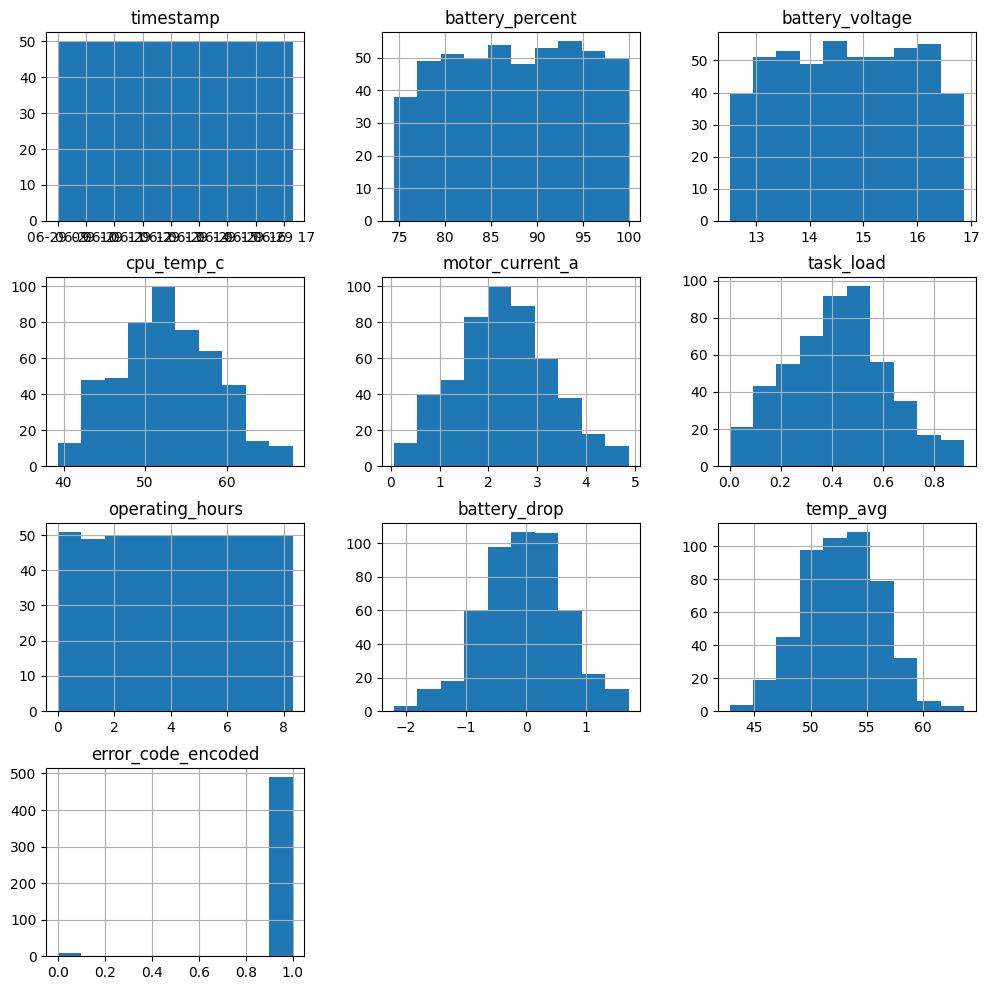

In [21]:
df.hist(figsize=(12,12))
plt.show()

#  Feature Engineering

In [22]:
df['hour'] = df['timestamp'].dt.hour
df['is_low_battery'] = df['battery_percent'] < 20
df['task_load_avg'] = df['task_load'].rolling(5).mean().bfill()

In [23]:
df

,timestamp,battery_percent,battery_voltage,cpu_temp_c,motor_current_a,task_load,operating_hours,error_code,date,time,battery_drop,temp_avg,error_code_encoded,hour,is_low_battery,task_load_avg
0,2025-06-29 09:00:00,100.0,16.85,61.2,3.53,0.68,0.00,OK,2025-06-29,09:00:00,0.0,56.566667,1,9,False,0.496
1,2025-06-29 09:01:00,99.9,16.88,57.0,3.11,0.58,0.02,OK,2025-06-29,09:01:00,-0.1,56.566667,1,9,False,0.496
2,2025-06-29 09:02:00,100.0,16.73,51.5,2.18,0.41,0.03,OK,2025-06-29,09:02:00,0.1,56.566667,1,9,False,0.496
3,2025-06-29 09:03:00,100.0,16.83,48.1,1.52,0.27,0.05,OK,2025-06-29,09:03:00,0.0,52.200000,1,9,False,0.496
4,2025-06-29 09:04:00,99.7,16.71,56.0,2.71,0.54,0.07,OK,2025-06-29,09:04:00,-0.3,51.866667,1,9,False,0.496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-06-29 17:15:00,75.5,12.67,65.1,4.29,0.80,8.25,OK,2025-06-29,17:15:00,-0.6,60.166667,1,17,False,0.630
496,2025-06-29 17:16:00,74.7,12.64,64.3,4.23,0.81,8.27,OK,2025-06-29,17:16:00,-0.8,63.666667,1,17,False,0.610
497,2025-06-29 17:17:00,75.1,12.64,58.4,3.38,0.64,8.28,OK,2025-06-29,17:17:00,0.4,62.600000,1,17,False,0.680
498,2025-06-29 17:18:00,74.7,12.51,58.0,3.30,0.60,8.30,OK,2025-06-29,17:18:00,-0.4,60.233333,1,17,False,0.712


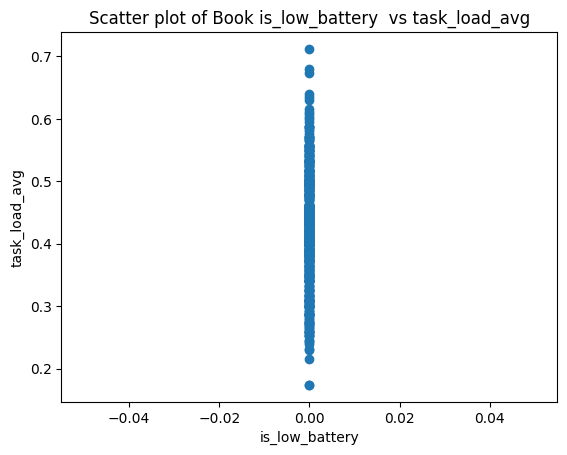

In [24]:
plt.scatter(df["is_low_battery"],df["task_load_avg"])
plt.xlabel("is_low_battery")
plt.ylabel("task_load_avg")
plt.title("Scatter plot of Book is_low_battery  vs task_load_avg")
plt.show()

In [25]:
total_gross_hours=df.groupby("operating_hours")["battery_drop"].sum()

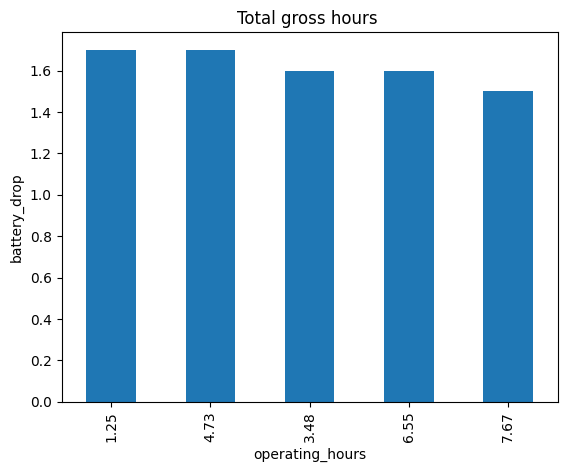

In [26]:
total_gross_hours.sort_values(ascending=False).head(5).plot(kind="bar")
plt.xlabel("operating_hours")
plt.ylabel("battery_drop")
plt.title("Total gross hours ")
plt.show()

# Model Building -Robot Maintenance Failure Prediction

In [27]:

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc
)
from sklearn.ensemble import RandomForestClassifier
import joblib


In [28]:

DATA_PATH = Path('robot_maintenancecsv.csv')  # same file you used
df = pd.read_csv(DATA_PATH)

# Ensure timestamp is datetime and ordered
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)

print('Loaded', df.shape[0], 'rows')
df.head()


Loaded 500 rows


,timestamp,battery_percent,battery_voltage,cpu_temp_c,motor_current_a,task_load,operating_hours,error_code,date,time
0,2025-06-29 09:00:00,100.0,16.85,61.2,3.53,0.68,0.00,OK,2025-06-29,09:00:00
1,2025-06-29 09:01:00,99.9,16.88,57.0,3.11,0.58,0.02,OK,2025-06-29,09:01:00
2,2025-06-29 09:02:00,100.0,16.73,51.5,2.18,0.41,0.03,OK,2025-06-29,09:02:00
3,2025-06-29 09:03:00,100.0,16.83,48.1,1.52,0.27,0.05,OK,2025-06-29,09:03:00
4,2025-06-29 09:04:00,99.7,16.71,56.0,2.71,0.54,0.07,OK,2025-06-29,09:04:00


In [29]:


LOOKAHEAD = 15  # minutes
# Future error flag
df['future_error'] = df['error_code'].shift(-LOOKAHEAD).apply(lambda x: 0 if x == 'OK' else 1)
df = df.dropna(subset=['future_error'])
df['future_error'] = df['future_error'].astype(int)
print('Positive class ratio:', df['future_error'].mean().round(3))

Positive class ratio: 0.048


In [30]:
# Basic time‑based features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Rolling stats (5‑min window)
roll_cols = ['battery_percent', 'battery_voltage', 'cpu_temp_c', 'motor_current_a', 'task_load']
for col in roll_cols:
    df[f'{col}_mean5'] = df[col].rolling(window=5, min_periods=1).mean()
    df[f'{col}_std5'] = df[col].rolling(window=5, min_periods=1).std()

# Deltas
for col in roll_cols:
    df[f'{col}_diff1'] = df[col].diff()

# Drop rows with any remaining NaN
df = df.dropna()
print('After feature engineering:', df.shape)

After feature engineering: (499, 28)


In [31]:

FEATURES = [c for c in df.columns if c not in ['timestamp', 'error_code', 'future_error', 'date', 'time']]
X = df[FEATURES]
y = df['future_error']

# Time‑based split: last 20% for test
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print('Train size:', X_train.shape, 'Test size:', X_test.shape)



Train size: (399, 23) Test size: (100, 23)


# Model Evaluation

In [32]:


model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

Classification report:
              precision    recall  f1-score   support

           0      0.840     1.000     0.913        84
           1      0.000     0.000     0.000        16

    accuracy                          0.840       100
   macro avg      0.420     0.500     0.457       100
weighted avg      0.706     0.840     0.767       100



C:\Users\Suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

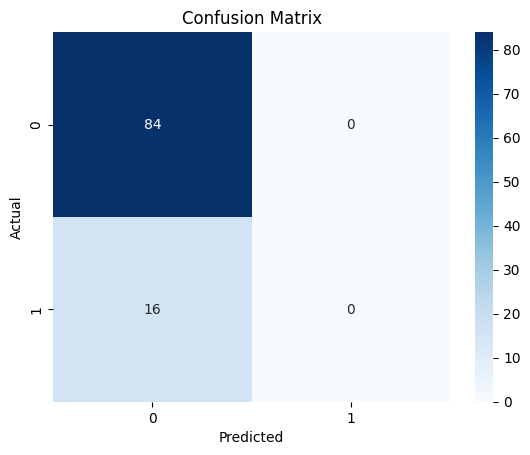

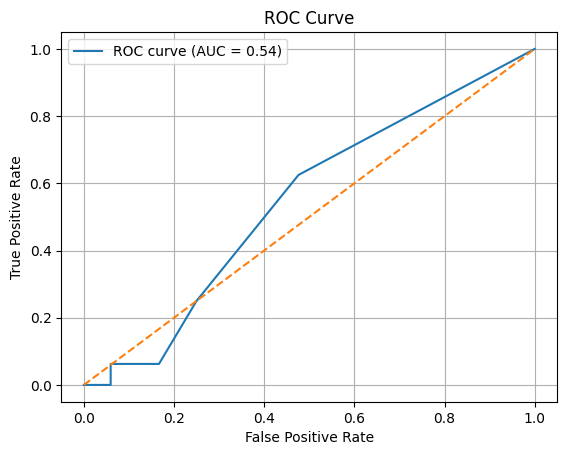

In [33]:


# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print('Classification report:')
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

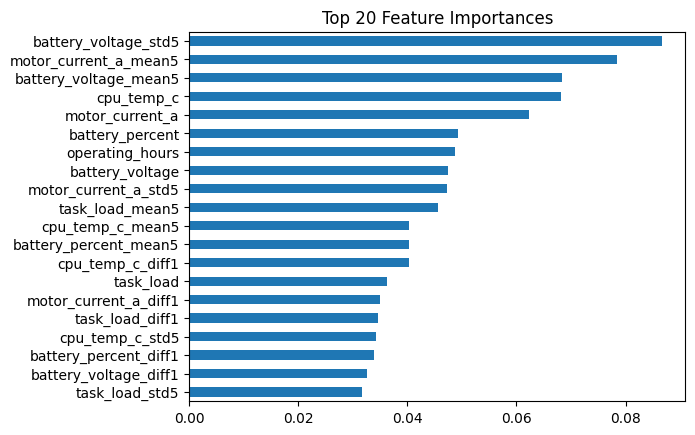

In [34]:
importances = pd.Series(model.feature_importances_, index=FEATURES).sort_values(ascending=False)[:20]
importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances')
plt.show()


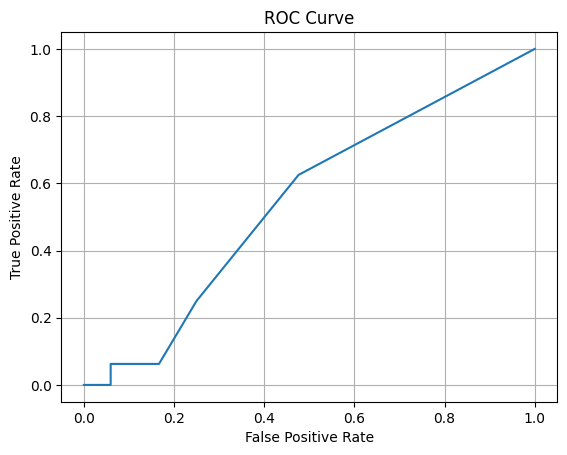

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()


In [36]:
import joblib
joblib.dump(model, "robot_failure_predictor.pkl")


['robot_failure_predictor.pkl']

In [37]:
joblib.dump(model, 'robot_failure_predictor.pkl')
print('Model saved to robot_failure_predictor.pkl')

Model saved to robot_failure_predictor.pkl


In [38]:
import pickle
with open('robot_failure_predictor.pkl', 'wb') as file:
    pickle.dump(model,file)

     